# Hotel Booking Demand

### <font color='#db5856'>Contexto</font> 

Una empresa hotelera quiere establecer una política de precios para seguros de cancelación
de reservas. Para ello les gustaría conocer de antemano la probabilidad de que una reserva
sea cancelada en el momento de hacerse.
Se dispone para ello de un dataset con un conjunto histórico de reservas, con algunos
atributos que caracterizan a cada una de ellas y una columna que indica si esa reserva se
canceló antes de tiempo (is_cancelled).

### <font color='#db5856'>Conjunto de Datos</font> 

Se puede consultar y descargar el dataset completo y el diccionario de datos del siguiente
enlace:

    ● https://www.kaggle.com/jessemostipak/hotel-booking-demand

Alternativamente, se puede descargar el dataset (o leer directamente desde pandas) en la
siguiente url:

    ● https://storage.googleapis.com/jz-example-data/hotel_bookings.csv
    
##### <font color='#db5856'>Variable objetivo</font> 
    
- `is_canceled`: Valor que indica si la reserva fue cancelada (1) o no (0)

### <font color='#db5856'>Ejercicio</font> 

**1) Identificar el tipo de problema: *modelo supervisado / no supervisado*, y en el caso de ser supervisado *regresión o clasificación*. Eliminar aquellas variables que no vayan a ser conocidas en el momento de realizar la predicción (por ejemplo reservation_status).**


Este problema se trata de un problema **Supervisado**. Estos algoritmos quieren “predecir” la variable objetivo. Para ello utilizan los atributos y la variable objetivo observada para el entrenamiento.

Cuando la variable objetivo es númerica (tratamos de predecir un número) se denomina regresión.

Cuando la variable objetivo es categórica (predecimos una clase) se denomina clasificación.

En nuestro ejemplo si queremos predecir si un cliente va a cancelar su reserva en el momento de hacerla, utilizariamos un algoritmo de **clasificación**.

Eliminaremos las siguientes variables, ya que se trata de información del futuro y no serán conocidas en el momento de realizar la predicción:

- `reservation_status`: Último estado de la reserva. 

- `reservation_status_date`: Fecha en la que se estableció el último estado.

Para la predicción no tendremos información sobre el estado de la reserva.

- `assigned_room_type`: Código del tipo de habitación asignada a la reserva.

A veces, el tipo de habitación asignado difiere del tipo de habitación reservada debido a razones de operación del hotel (por ejemplo, overbooking) o por solicitud del cliente. Esto es un dato que no sabremos en el momento de la predicción.

**2) Realizar un análisis exploratorio breve de las variables, y pasar a numérico aquellas variables que lo requieran utilizando alguna de las técnicas aprendidas.**

En primer lugar importaremos las librerías necesarias en una primera instancia. A medida que avance el ejercicio se irán importando más.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos nuestro dataset.

In [2]:
URL = "https://storage.googleapis.com/jz-example-data/hotel_bookings.csv"

dataset = pd.read_csv(URL, sep = ',')
# Mostramos las primeras filas
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Antes del Análisis Exploratorio, vamos a llevar a cabo un pequeño preprocesado de los datos y cambiaremos los tipos de datos:

#### <font color='#db5856'>Preprocesamiento de datos</font> 

In [3]:
#Trabajamos con una copia del dataset original
data = dataset.copy()

- Primero veremos si nuestro dataset contiene **Valores Nulos**

In [4]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Existen valores nulos en los atributos `company`, `country`, `agent` y `children`

In [5]:
# El country se representa por el formato ISO
data.country.head()

0    PRT
1    PRT
2    GBR
3    GBR
4    GBR
Name: country, dtype: object

Vamos a sustituir los valores nulos de `country` por su Moda, al ser una variable categórica:

In [6]:
data.country.mode().to_string().split()[1] # moda

'PRT'

In [7]:
country_null_indexes = data.country[data.country.isnull()].index  #índices con valores nulos
data.country.fillna(data.country.mode().to_string().split()[1], inplace = True) # Insertamos la moda en los nulos
data.country[country_null_indexes] # Vemos que se ha insertado la Moda en esos índices

30        PRT
4127      PRT
7092      PRT
7860      PRT
8779      PRT
         ... 
65908     PRT
65909     PRT
65910     PRT
80830     PRT
101488    PRT
Name: country, Length: 488, dtype: object

Como los atributos `Agent` y `Company` se refieren a IDs, los vamos a sustituir por 0:

In [8]:
data[['agent','company']] = data[['agent','company']].fillna(0)

Sustituiremos los 4 valores nulos de `children` por la media, al ser una variable numérica:

In [9]:
round(data.children.mean())

0

In [10]:
data.children.fillna(round(data.children.mean()), inplace = True)

In [11]:
# Vemos que ya no hay valores nulos
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Veamos que existen reservas donde no hay ningún huesped.

In [12]:
data[['adults','children','babies']][((data.adults == 0) & (data.children == 0) & (data.babies == 0))]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


Hay 180 reservas que no tienen huéspedes, cosa que no tiene sentido. Las eliminamos

In [13]:
data.shape

(119390, 32)

In [14]:
data.drop(data[((data.adults == 0) & (data.children == 0) & (data.babies == 0))].index, axis = 0, inplace = True)

In [15]:
data.shape #se han borrado las 180 filas

(119210, 32)

#### <font color='#db5856'>Conversión de Tipo de Datos</font> 

Veamos los tipos de datos de nuestro dataset

In [16]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Observamos que `children` es de tipo *float64* y debería ser un *Int64*. Además los IDs suelen ser números enteros, por lo que deberíamos cambiar todos los campos que contienen IDs a *Int64*

In [17]:
data[['children','agent','company']] = data[['children','agent','company']].astype('int64')
data[['children','agent','company']].dtypes

children    int64
agent       int64
company     int64
dtype: object

### <font color='#db5856'>Análisis Exploratorio</font> 

En primer lugar vamos a quitar las variables mencionadas en el apartado 1), ya que contienen información de futuro y no las sabremos a la hora de hacer la predicción:

In [18]:
to_remove = ['reservation_status',
             'reservation_status_date',
             'assigned_room_type']

In [19]:
data.drop(to_remove, axis = 1, inplace = True)

In [20]:
rows, columns = data.shape
print(f'El dataset tiene {rows} observaciones y {columns - 1} atributos')  # colums - la variable objetivo

El dataset tiene 119210 observaciones y 28 atributos


#### Variable Objetivo:

Vemos si el dataset está desbalanceado.

No cancelados: 75011
Cancelados: 44199


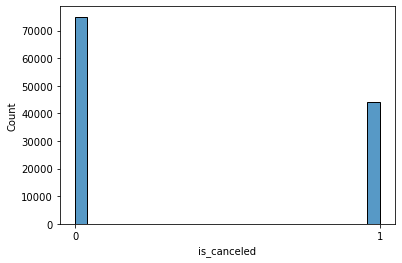

In [21]:
plt.xticks([0,1])
sns.histplot(data = data, x = 'is_canceled');
ys = data['is_canceled'].value_counts()
print(f"No cancelados: {ys[0]}\nCancelados: {ys[1]}")  # Podría considerarse no desbalanceado

#### Features:

Definimos una función para dibujar el histograma de las Features que nos convengan contra la variable objetivo:

In [22]:
def plot_feature(data,x):
    fig = plt.figure(figsize = (5,4))
    plt.title(f'Histograma Feature: "{x}"\n')
    sns.histplot(data = data, x = x, hue= 'is_canceled', multiple = 'dodge')
    plt.show()

Comenzamos el análisis con la variable `hotel`

Observamos que hay más reservas en los Hoteles de Ciudad que en los Resorts. No sólo eso, sino que también los clientes suelen cancelar más reservas en la ciudad.

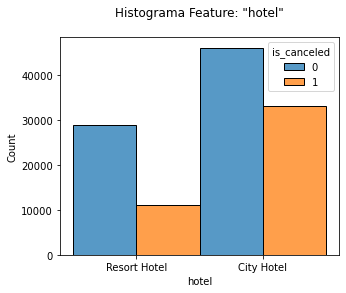

In [23]:
plot_feature(data,x = 'hotel')

Analizamos las noches totales sumando las variables `stays_in_week_nights` y  `stays_in_weekend_nights` 

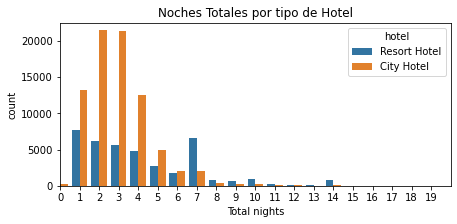

In [24]:
data4nights = data.copy() #creamos una copia solo para este mini apartado
data4nights['Total nights'] = data4nights['stays_in_weekend_nights'] + data4nights['stays_in_week_nights']

fig = plt.figure(figsize = (7,3))
sns.countplot(data = data4nights, x='Total nights', hue='hotel')
plt.xlim([0,20])
plt.title('Noches Totales por tipo de Hotel')
plt.xticks(np.arange(0,20,step = 1))
plt.show()

Se observa que en los hoteles de ciudad y resorts, los clientes suelen pasar entre 1 y 4 noches, sin embargo en los hoteles Resort también suelen elegir pasar una estancia más larga (7 días).

Vamos a ver si el número de reservas aumenta o disminuye en función del estado civil de cada persona. En nuestro dataset no tenemos ese atributo, pero podemos saber si esa persona tiene hijos o si está soltero.

In [25]:
couple = len(data[(data.adults == 2) & (data.children == 0) & (data.babies == 0)]) # pareja
single = len(data[(data.adults == 1) & (data.children == 0) & (data.babies == 0)]) # soltero
family = len(data[(data.adults >= 2) & (data.children != 0)]) # familia
friends = len(data[(data.adults >= 2) & (data.children == 0) & (data.babies == 0)]) # Grupo de amigos mayores de Edad

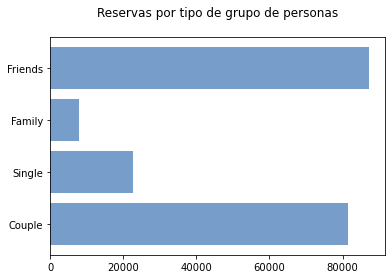

In [26]:
values = [couple, single, family, friends]
tags = ['Couple','Single', 'Family', 'Friends']
plt.barh(y = tags, width = values, color = '#779ecb')
plt.title('Reservas por tipo de grupo de personas\n')
plt.show()

Hay más reservas cuando son parejas o un viaje de amigos.

Veamos de que `country` provienen los clientes que más reservan y los que más cancelan:

In [27]:
best_countries = data.country[data['is_canceled']== 0].value_counts().head(12) # países con mas reservas no canceladas
worst_countries = data.country[data['is_canceled']== 1].value_counts().head(12) # países con más reservas canceladas

Para obtener el nombre completo de los países, importamos la librería *pycountry*

In [28]:
import pycountry as pc
#nombre completo países con mas reservas no canceladas
best_country_name = [pc.countries.get(alpha_3=name).name for name in best_countries.index] 
#nombre completo países con mas reservas canceladas
worst_country_name = [pc.countries.get(alpha_3=name).name for name in worst_countries.index]

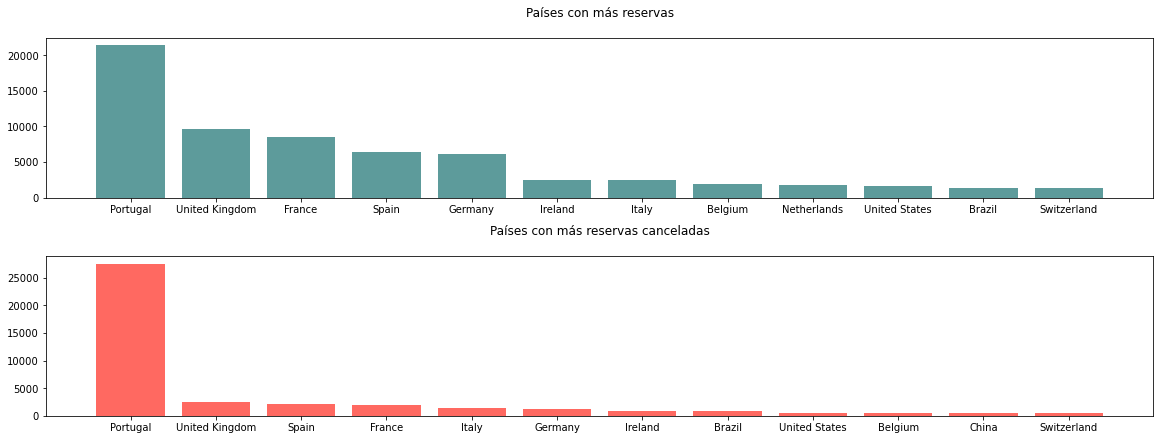

In [29]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(16,6), constrained_layout=True)
ax1.bar(best_country_name,best_countries.values, color = '#5d9b9b')
ax2.bar(worst_country_name,worst_countries.values, color = '#ff6961')
ax1.set_title('Países con más reservas\n')
ax2.set_title('Países con más reservas canceladas\n')
plt.show()

Se observa que la mayoría de reservas provienen de Portugal, UK, Francia y España, entre otros. De igual manera, estos países también son los que más reservas cancelan.

Ahora vamos a analizar los años y los meses donde los hoteles reciben más reservas. Para ello se analizarán las features `arrival_date_year` y `arrival_date_month`

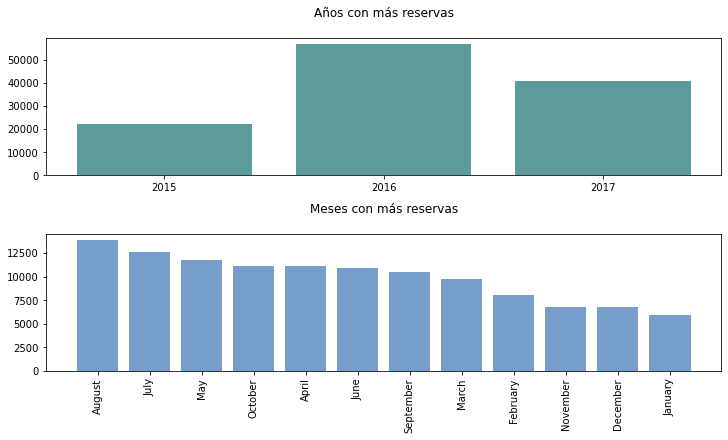

In [30]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,6), constrained_layout=True)
years = data['arrival_date_year'].value_counts() 
months = data['arrival_date_month'].value_counts()
ax1.bar(years.index,years.values, color = '#5d9b9b')
ax2.bar(months.index,months.values, color = '#779ecb')
plt.sca(ax1)
plt.xticks([2015, 2016, 2017])
ax1.set_title('Años con más reservas\n')
ax2.set_title('Meses con más reservas\n')
plt.sca(ax2)
plt.xticks(rotation = 90)
plt.show()

El año con más reservas es el 2016. En verano, concretamente en Agosto y Julio, la gente reserva más. Por el contrario, a principios de año (Enero) no suele haber tanta demanda.

También se podrían analizar por una parte algunas de las variables categóricas más redundantes frente a la variable objetivo.

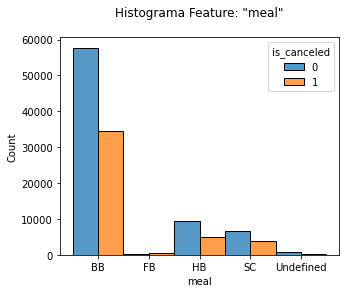

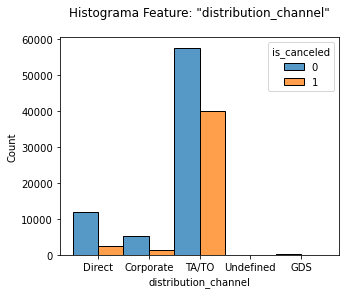

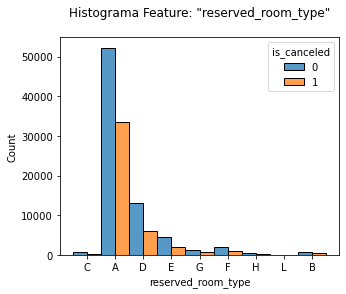

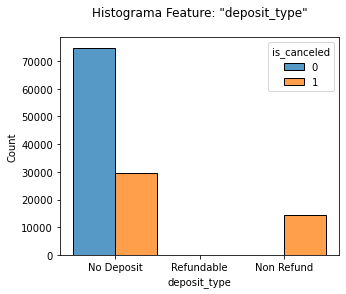

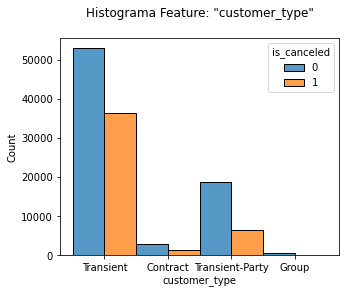

In [31]:
cat_features = ['meal','distribution_channel','reserved_room_type','deposit_type','customer_type']
for feature in cat_features:
    plot_feature(data, x = feature)

En general, el número de reservas confirmadas y anuladas suele ser proporcional. Sin embargo si nos fijamos en `deposit_type`, cuando no reembolsan el depósito, casi la totalidad de las reservas se anulan. 

Se podría hacer lo mismo con alguna de las variables numéricas.

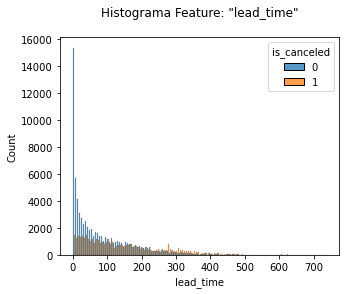

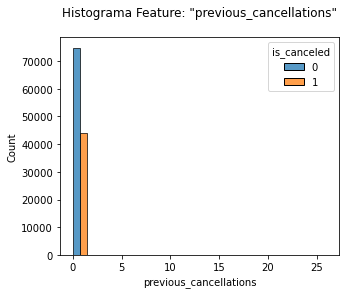

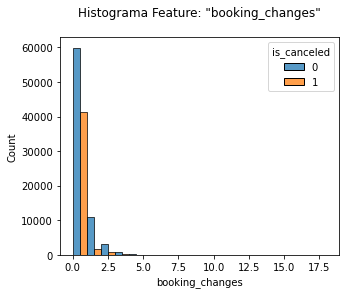

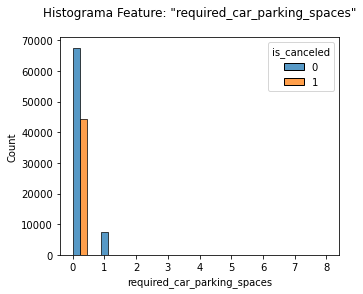

In [32]:
num_features = ['lead_time', 'previous_cancellations','booking_changes', 'required_car_parking_spaces']
for feature in num_features:
    plot_feature(data, x = feature)

Por ejemplo, se puede apreciar en el histograma correspondiente al feature `lead_time` que a medida que pasa más tiempo desde que se hizo la reserva hasta la fecha de llegada, hay una mayor cancelación de reservas, por tanto si alguien reserva con mucha antelación, puede haber riesgo de cancelación. Además, las personas que han reservado 1 plaza de garaje, no suelen cancelar la reserva.

#### <font color='#db5856'>Selección no supervisada</font>

#### Eliminación de características correlacionadas

Ahora dibujaremos la matriz de correlaciones, para ver las correlaciones entre nuestras variables

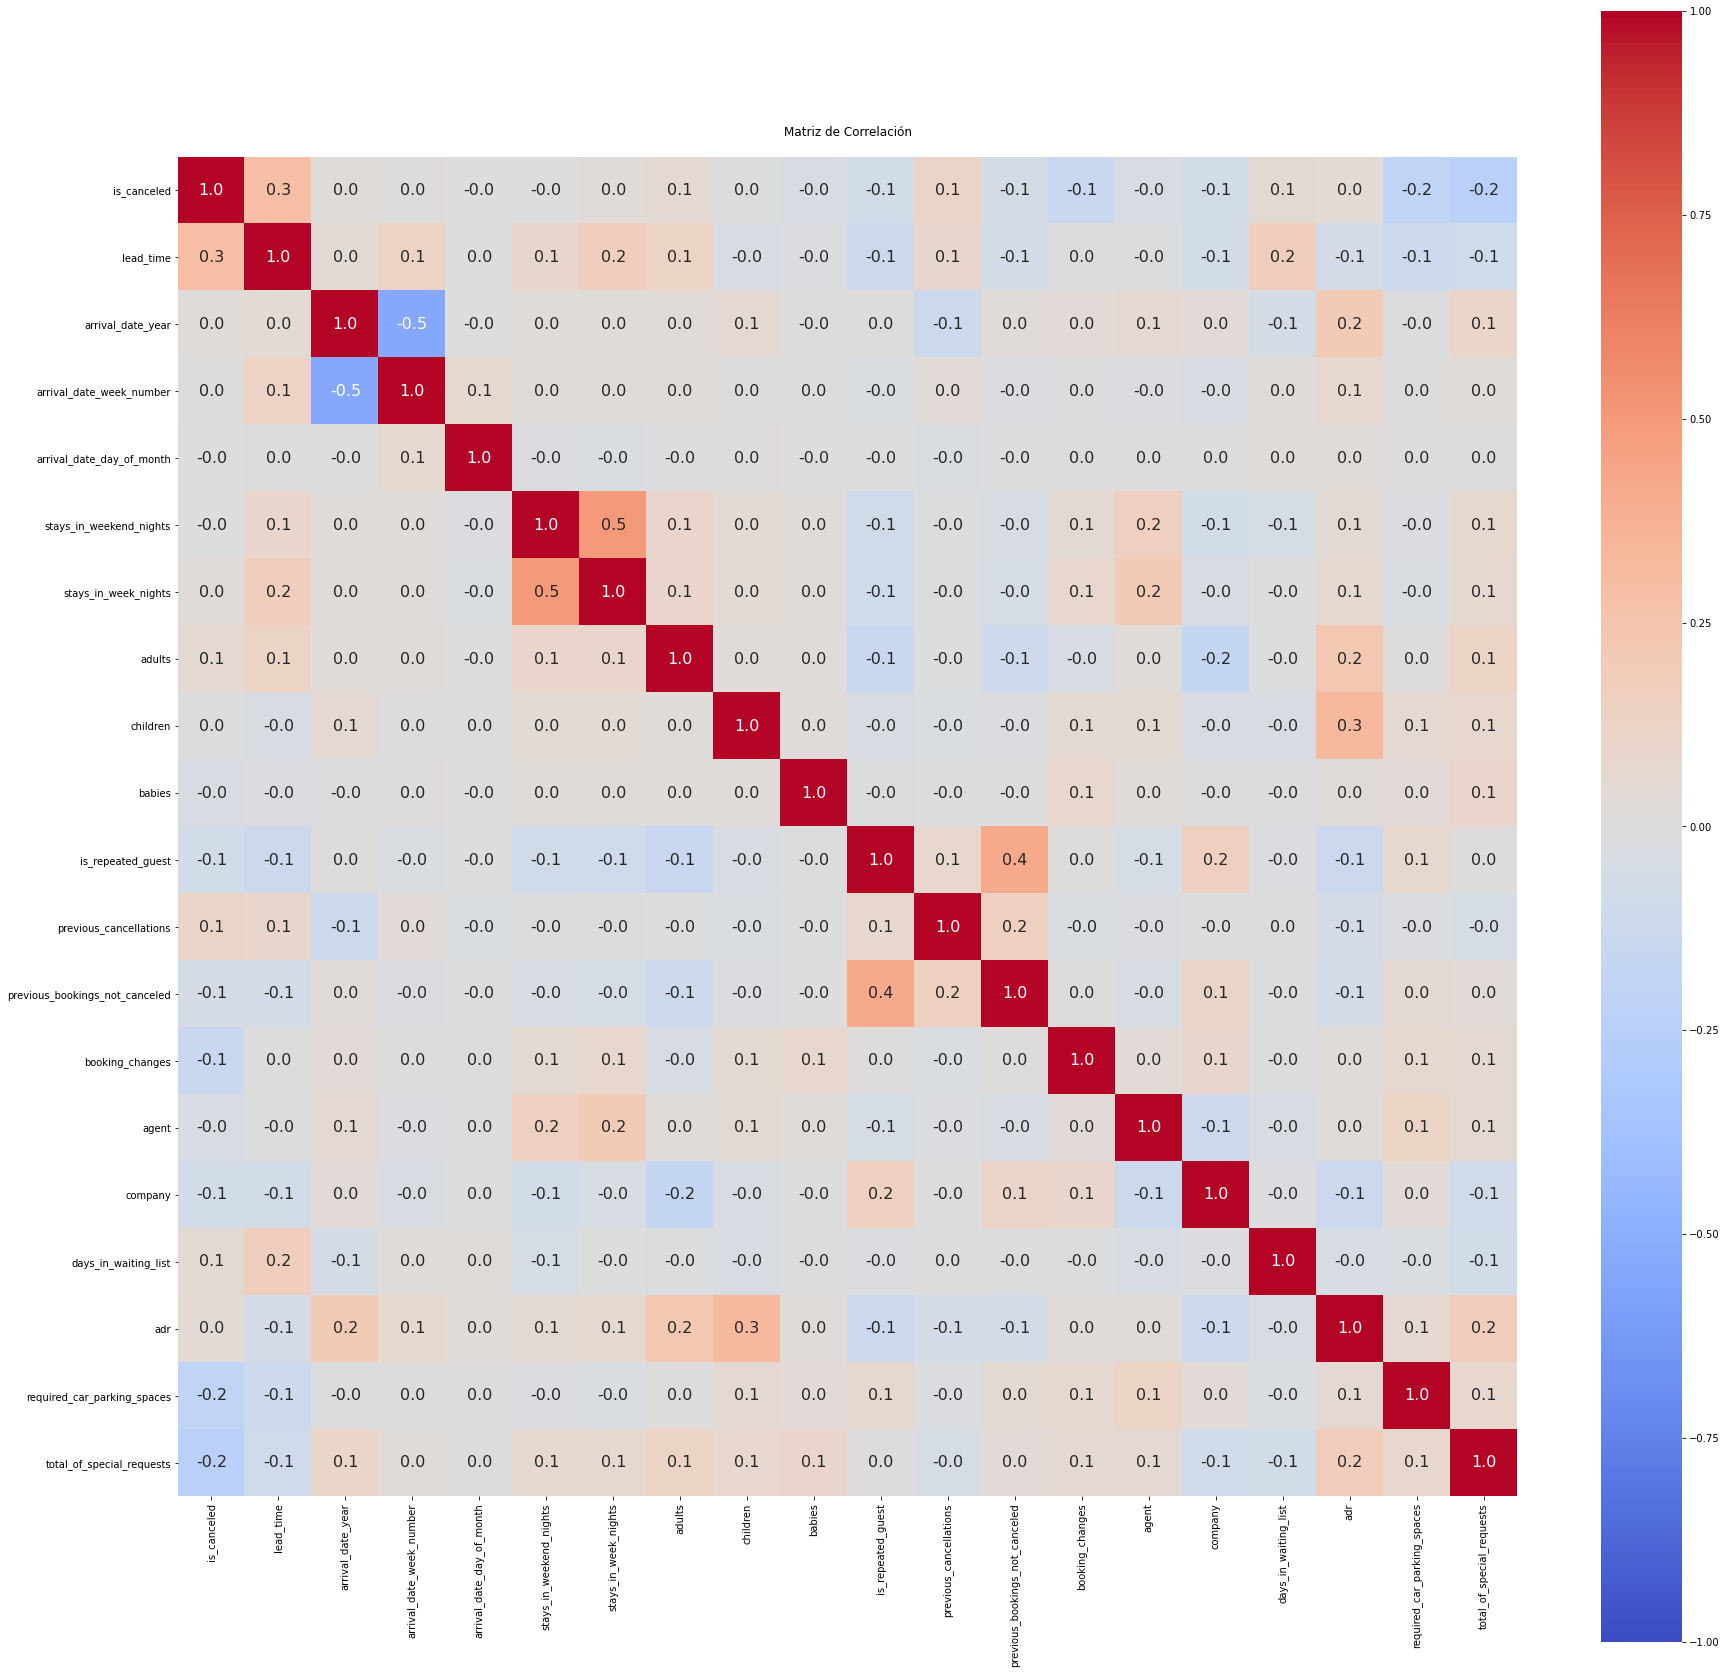

In [33]:
fig, ax = plt.subplots(figsize = (30, 30))
plt.title('Matriz de Correlación\n')
sns.heatmap(data.corr(),
            vmax = 1, vmin = -1,
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            ax = ax, 
            annot_kws={'size':16},square=True)
plt.show()

Como podemos ver, se puede apreciar algunos patrones en la imagen que determinan que hay variables algo correlacionadas (positiva o negativamente).

*Scikit-learn*, por ahora no implementa ningún selector de variables basado en multicolineariedad. Por ello vamos a implementar el nuestro siguiendo el mismo estilo que el resto de transformadores de *scikitlearn*.

In [34]:
from scipy.stats import pearsonr

class ColinearityFeatureSelector(object):
  """ Implementa una transformación con el estilo de scikit-learn.
  """

  def __init__(self, threshold = 1.0):
    """ Constructor del objeto.
    Args:
      threshold (float): Umbral que decide si dos variables son colineares. Es
        el coeficiente de correlacion de pearson elevado al cuadrado.
    """
    self.threshold = threshold

  def fit(self, X):
    """ Entrenamiento del transformador.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      Referencia a sí mismo.
    """
    to_remove = []
    for i in range(X.shape[1]):
      for j in range(i + 1, X.shape[1]):
        r, _ = pearsonr(X[:, i], X[:, j])  # Ignora el segundo valor de la tupla
        if r**2 >= self.threshold: 
          to_remove.append(j)
    self.support_ = np.array([i not in to_remove for i in range(X.shape[1])])
    return self

  def transform(self, X):
    """ Elimina las variables que se han marcado como colineares.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return X[:, self.support_]

  def fit_transform(self, X):
    """ Entrena, y luego transforma la matriz X.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return self.fit(X).transform(X)

Aplicando el selector de variables a nuestros datos de ejemplo encontramos:

In [35]:
X_num = data.loc[:,(data.dtypes == 'float64') | (data.dtypes == 'int64')] #consideramos las variables numéricas
num_features = X_num.columns
X_num = X_num.values

In [36]:
cl_feature_selector = ColinearityFeatureSelector(threshold = 0.9)
cl_feature_selector.fit(X_num)
print("Features to remove:")
for feature in num_features[~cl_feature_selector.support_]:
  print(f"\t{feature}")

Features to remove:


No hay ninguna variable numérica que esté correlacionada, por lo que en este caso no eliminamos ninguna.

**3) Elegir razonadamente una estrategia de validación y una métrica y dividir el dataset en entrenamiento y validación.**

#### <font color='#db5856'>Encoding</font> 

In [37]:
X = data.loc[:,data.columns != 'is_canceled']
feature_names = X.columns
y = data['is_canceled'] # ya está codificada

Realizamos el one-hot-encoding de las variables categóricas:

In [38]:
categorical_feat = list(data.dtypes[data.dtypes == np.object].index) # categorical features para el one-hot-encoding
X = pd.get_dummies(X, columns = categorical_feat, drop_first = True)
X.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,2015,27,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,2015,27,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,2015,27,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,2015,27,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### <font color='#db5856'>Estrategia de Validación</font> 

Dividimos en set de entrenamiento y test, y el set de entrenamiento lo volvemos a dividir en train y val y trabajamos con estos últimos. Así al final del modelo, cuando tengamos que validar, cogemos el primer set de test, que no tendrá ningún bias.

In [39]:
from sklearn.model_selection import train_test_split

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

# División del set de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2)

Vamos a escoger como métrica el ROC AUC score. AUC significa "área bajo la curva ROC". Esto significa que el AUC mide toda el área bidimensional por debajo de la curva ROC completa. Esta métrica es bastante buena para modelos desbalanceados. En nuestro caso no se trata de un modelo que esté muy desbalanceado, pero si que es verdad que hay más reservas sin cancelar que canceladas. De todas formas, en la validación del modelo también se aplicará el Accuracy.

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

Definimos una función para cuando tengamos que dibujar la curva:

In [41]:
def plot_roc_curve(y_val, y_pred):
  auc = roc_auc_score(y_val, y_pred)
  title = f"AUC: {auc:.4f}"
  fig, ax = plt.subplots(figsize = (6, 6))
  ax.set_title(title)
  fpr, tpr, th = roc_curve(y_val, y_pred)
  ax.plot(fpr, tpr)
  ax.set_ylabel("False positive rate [%]")
  ax.set_xlabel("True positive rate [%]")
  ax.plot([0, 1], [0, 1], linestyle="--")
  plt.show()

**4) Entrenar y evaluar al menos dos modelos de clasificación de los estudiados en el
módulo. Para mejorar los modelos, se valorará la utilización de técnicas de
optimización de hiper-parámetros y de selección de variables. Elegir razonadamente
el mejor de los modelos probados**

### <font color='#db5856'>Modelización</font> 

#### Logistic Regression:

Una regresión logística es un modelo utilizado para clasificación binaria, cuya frontera de decisión es linear.

Como podemos observar, su output es un número entre 0 y 1, que representa la probabilidad de que una instancia pertenezca a la clase 0 o la clase 1.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

lgr = LogisticRegression(max_iter = 500)  # aumentamos el número de iteraciones ya que sino no converge

pipeline = Pipeline([
  ("scaler", MinMaxScaler()),
  ("classifier", lgr)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_val)[:, 1]

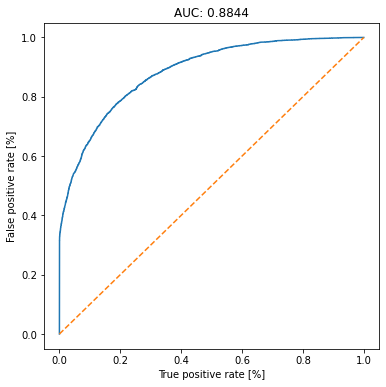

In [43]:
plot_roc_curve(y_val, y_pred)

#### Random Forest:

Un problema fundamental de los árboles de decisión es que, si no tenemos mucho cuidado con los hiperparámetros tienden a sobreajustar el dataset.

Un *Random Forest* tiende a solucionar este problema. Es un conjunto de arboles de decisión que trabajan de manera paralela.

Se entrena un número de árboles de decisión utilizando sólo un subset de muestras y un subset de características.

La predicción del modelo, será la media de todos los resultados de los árboles de decisión en el caso de regresión o la clase más votada en el caso de clasificación.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rnf = RandomForestClassifier(n_estimators=500)

pipeline = Pipeline([
  ("scaler", MinMaxScaler()),
  ("classifier", rnf)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_val)[:, 1]

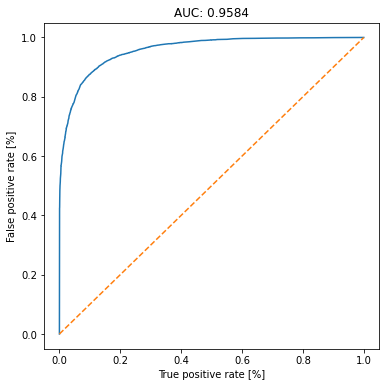

In [46]:
plot_roc_curve(y_val, y_pred)

#### Gradient Boosting:

El desarrollo matemático es un poco complejo, pero conceptualmente, se basa en utilizar árboles de decisión (generalmente bastante regularizados) de manera secuencial, donde el arbol $N+1$ corrige los errores que ha cometido el árbol $N$.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500)

pipeline = Pipeline([
  ("scaler", MinMaxScaler()),
  ("classifier", gbc)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_val)[:, 1]

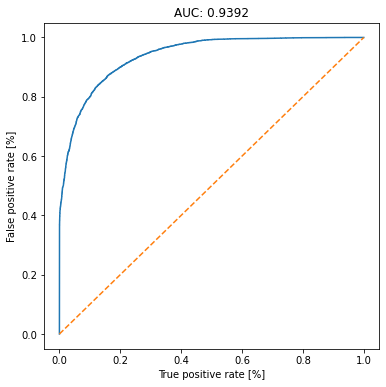

In [48]:
plot_roc_curve(y_val, y_pred)

Observamos que en una primera instancia, el modelo de **Random Forest** obtiene mejor AUC score. Por tanto, vamos a llevar a cabo una optimización de hiper-parámetros y selección de variables empleando este modelo.

#### <font color='#db5856'>Selección supervisada</font>

El método más utilizado, y el único implementado en *scikit-learn* es el de *backward elimination*.

* __Eliminación de características (backward elimination)__ lo que implica comenzar con todas las características candidatas, comprobar el efecto de eliminar una característica utilizando un criterio para comparar el nuevo modelo con el anterior, eliminar en cada paso una característica con la que se mejore el modelo y repetir este proceso hasta que eliminar una característica no mejore el modelo.

In [ ]:
# Esta celda tarda MUCHO en entrenar
from sklearn.feature_selection import RFECV

rfe_feature_selector = RFECV(
    RandomForestClassifier(),
    cv = 5,
    scoring = "neg_log_loss"
).fit(X_train, y_train)

Como este modelo tarda mucho en entrenar, guardamos el modelo en el fichero 'feature_selector.pkl'

In [50]:
import joblib
joblib.dump(rfe_feature_selector, 'feature_selector.pkl') # Guardo el modelo.

NameError: name 'rfe_feature_selector' is not defined

In [51]:
rfe_feature_selector = joblib.load('feature_selector.pkl') # Carga del modelo.

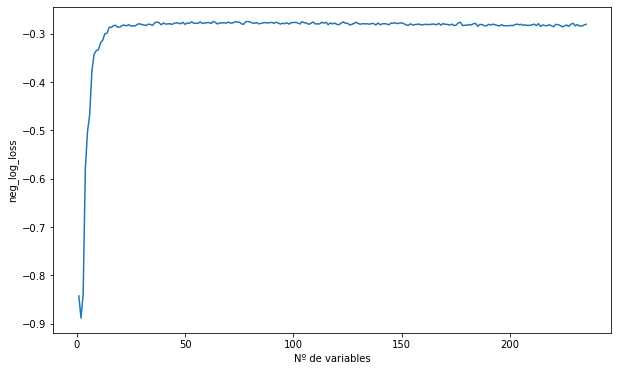

Features to remove:
	babies
	meal_FB
	meal_Undefined
	country_AGO
	country_AIA
	country_ALB
	country_AND
	country_ARE
	country_ARG
	country_ARM
	country_ASM
	country_ATA
	country_ATF
	country_AUS
	country_AZE
	country_BDI
	country_BEN
	country_BFA
	country_BGD
	country_BGR
	country_BHR
	country_BHS
	country_BIH
	country_BLR
	country_BOL
	country_BRB
	country_BWA
	country_CAF
	country_CHL
	country_CIV
	country_CMR
	country_COL
	country_COM
	country_CPV
	country_CRI
	country_CUB
	country_CYM
	country_CYP
	country_CZE
	country_DJI
	country_DMA
	country_DNK
	country_DOM
	country_DZA
	country_ECU
	country_EGY
	country_EST
	country_ETH
	country_FIN
	country_FJI
	country_FRO
	country_GAB
	country_GEO
	country_GGY
	country_GHA
	country_GIB
	country_GLP
	country_GNB
	country_GRC
	country_GTM
	country_GUY
	country_HKG
	country_HND
	country_HRV
	country_HUN
	country_IDN
	country_IMN
	country_IND
	country_IRN
	country_IRQ
	country_ISL
	country_ISR
	country_JAM
	country_JEY
	country_JOR
	country_JP

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("neg_log_loss")
ax.set_xlabel("Nº de variables")
ax.plot(
    [i + 1 for i in range(X_train.shape[1])],
    rfe_feature_selector.grid_scores_
)
plt.show()

print("Features to remove:")
for feature in X.columns[~rfe_feature_selector.support_]:
  print(f"\t{feature}")

Observamos que hay muchas variables con las que, al incluirlas, no mejora el modelo, por tanto las eliminamos.

In [53]:
X_train = rfe_feature_selector.transform(X_train) # Quitamos las variables del set de entrenamiento
X_val = rfe_feature_selector.transform(X_val)  # Las quitamos de aquí también porque luego concatenaremos 
                                               #ambos X_train y X_val para la Evaluación del Modelo
X_test = rfe_feature_selector.transform(X_test) # Lo mismo con X_test (Primer train_test_split)

In [54]:
X_train.shape # hemos eliminado 172 atributos

(76294, 63)

#### <font color='#db5856'>Optimización de Hiper-parámetros</font>

In [55]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(1)

param_dist = {  # Te coge combinaciones aleatorias entre estos parametros
    "n_estimators": list(range(20, 600)),    
    "min_samples_split": list(range(10, 60)),
    "max_depth": list(range(1,100))
}

rand_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = param_dist,
    n_iter = 3,  # 3 combinaciones de parámetros
    cv = 3, # cross_validation parameter
    verbose = 1,
    return_train_score = True,
    scoring = "neg_log_loss"
).fit(X_train, y_train)  # esta celda también tarda un poco en ejecutarse

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.2min finished


In [56]:
print(f"Best parameters: {rand_search.best_params_}")
print(f"Best score: {rand_search.best_score_:.3f}")

Best parameters: {'n_estimators': 436, 'min_samples_split': 37, 'max_depth': 89}
Best score: -0.296


### <font color='#db5856'>Evaluación del Modelo</font> 

Introducimos los mejores parámetros en el modelo de Random Forest

In [57]:
rfc = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],
                             min_samples_split = rand_search.best_params_['min_samples_split'],
                             max_depth = rand_search.best_params_['max_depth'])
rfc.fit(np.row_stack([X_train, X_val]), np.concatenate([y_train, y_val]))
y_pred = rfc.predict_proba(X_test)[:, 1] #X_test sin bias

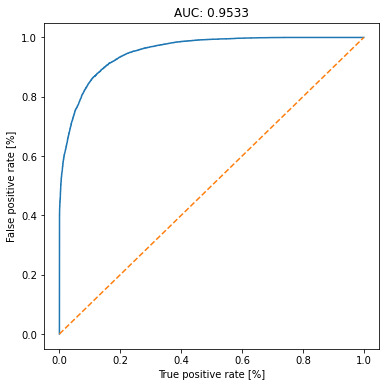

In [58]:
plot_roc_curve(y_test, y_pred) #y_test sin bias

Vamos a calcular también el Accuracy del modelo:

In [61]:
from sklearn.metrics import accuracy_score

y_train_pred = rfc.predict(np.row_stack([X_train, X_val]))
y_test_pred = rfc.predict(X_test)

acc_train = accuracy_score(np.concatenate([y_train,y_val]), y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print(f"{type(rfc).__name__} Accuracy -> Train: {acc_train:.2f} , Test: {acc_test:.2f}")

RandomForestClassifier Accuracy -> Train: 0.91 , Test: 0.88


Observamos que la variable con más importancia en el modelo es `deposit_type_Non_Refund`, que si recordamos, en el análisis exploratorio vimos que era un atributo del que se podían sacar ciertas conclusiones. ("Sin embargo si nos fijamos en `deposit_type`, cuando no reembolsan el depósito, casi la totalidad de las reservas se anulan.")

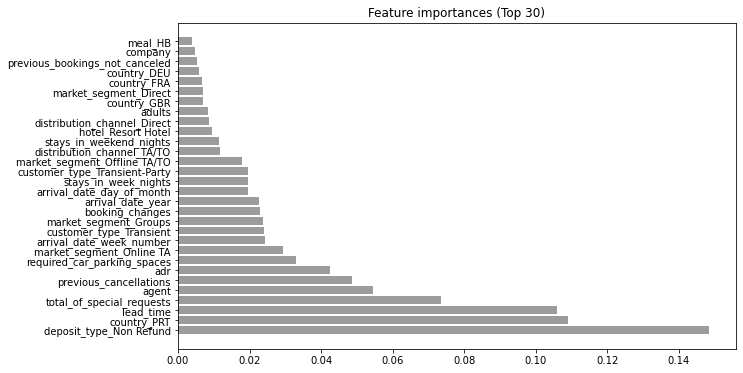

In [63]:
importances = pd.DataFrame({
    "VARIABLE": X.columns[rfe_feature_selector.support_],
    "IMPORTANCE": rfc.feature_importances_
}).sort_values("IMPORTANCE", ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Feature importances (Top 30)")
ax.barh(importances["VARIABLE"].head(30), importances["IMPORTANCE"].head(30), color = '#9c9c9c')
plt.show()